<a href="https://colab.research.google.com/github/Sushila-Phogat/Teachnook-Assignments/blob/main/Main_Project/Code/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preprocessing

In [194]:
#Basic Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
# Models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
#perfomance check
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#Loading Training Data
df_train=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Teachnook-Assignments/main/Main_Project/Data/train.csv')
df_train

,No,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,AQI
0,1,-16,-4.0,1020.0,SE,1.79,0,0,129
1,2,-15,-4.0,1020.0,SE,2.68,0,0,148
2,3,-11,-5.0,1021.0,SE,3.57,0,0,159
3,4,-7,-5.0,1022.0,SE,5.36,1,0,181
4,5,-7,-5.0,1022.0,SE,6.25,2,0,138
...,...,...,...,...,...,...,...,...,...
41752,41753,-23,-2.0,1034.0,NW,231.97,0,0,8
41753,41754,-22,-3.0,1034.0,NW,237.78,0,0,10
41754,41755,-22,-3.0,1034.0,NW,242.70,0,0,10
41755,41756,-22,-4.0,1034.0,NW,246.72,0,0,8


In [195]:
#Loading Test Data
df_test=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Teachnook-Assignments/main/Main_Project/Data/test.csv')
df_test 

,No,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,AQI
0,33406,-20,-9.0,1033,NW,6.71,0,0,NaN
1,33407,-19,-8.0,1034,NW,11.63,0,0,NaN
2,33408,-21,-10.0,1034,NW,15.65,0,0,NaN
3,33409,-19,-9.0,1034,cv,0.89,0,0,NaN
4,33410,-20,-9.0,1034,cv,1.78,0,0,NaN
...,...,...,...,...,...,...,...,...,...
8347,41753,-23,-2.0,1034,NW,231.97,0,0,NaN
8348,41754,-22,-3.0,1034,NW,237.78,0,0,NaN
8349,41755,-22,-3.0,1034,NW,242.70,0,0,NaN
8350,41756,-22,-4.0,1034,NW,246.72,0,0,NaN


In [196]:
  #Loading Submit Data
df_submit=pd.read_csv('https://raw.githubusercontent.com/Sushila-Phogat/Teachnook-Assignments/main/Main_Project/Data/submit.csv')
df_submit

,No,AQI
0,33406,NaN
1,33407,NaN
2,33408,NaN
3,33409,NaN
4,33410,NaN
...,...,...
8347,41753,NaN
8348,41754,NaN
8349,41755,NaN
8350,41756,NaN


In [197]:
df_train.columns

Index(['No', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'AQI'], dtype='object')

In [198]:
df_train.isnull().sum()

No      0
DEWP    0
TEMP    0
PRES    0
cbwd    0
Iws     0
Is      0
Ir      0
AQI     0
dtype: int64

In [199]:
df_train.duplicated().sum()

0

In [200]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41757 entries, 0 to 41756
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      41757 non-null  int64  
 1   DEWP    41757 non-null  int64  
 2   TEMP    41757 non-null  float64
 3   PRES    41757 non-null  float64
 4   cbwd    41757 non-null  object 
 5   Iws     41757 non-null  float64
 6   Is      41757 non-null  int64  
 7   Ir      41757 non-null  int64  
 8   AQI     41757 non-null  int64  
dtypes: float64(3), int64(5), object(1)
memory usage: 2.9+ MB


In [201]:
df_train.describe()

,No,DEWP,TEMP,PRES,Iws,Is,Ir,AQI
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,20879.000000,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866,98.613215
std,12054.351932,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165,92.050387
min,1.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000,0.000000
25%,10440.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000,29.000000
50%,20879.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000,72.000000
75%,31318.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000,137.000000
max,41757.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000,994.000000


In [202]:
df_train.cbwd.unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [203]:
#Converting categorical value to numerical
df_train[['cbwd']] = df_train[['cbwd']].apply(LabelEncoder().fit_transform)
df_test[['cbwd']] = df_test[['cbwd']].apply(LabelEncoder().fit_transform)

In [204]:
df_train['cbwd'].unique(),df_test['cbwd'].unique()

(array([2, 3, 1, 0]), array([1, 3, 2, 0]))

#EDA

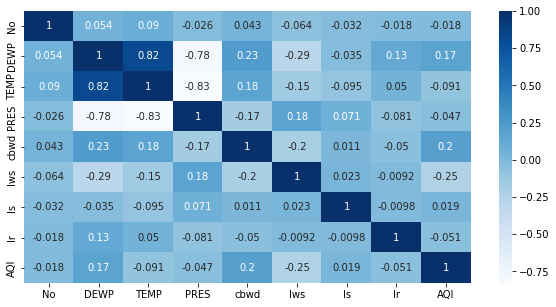

In [205]:
plt.figure(figsize=(10,5))
sns.heatmap(df_train.corr(),cbar=True,annot=True,cmap='Blues')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd380ed6790>,
      dtype=object)

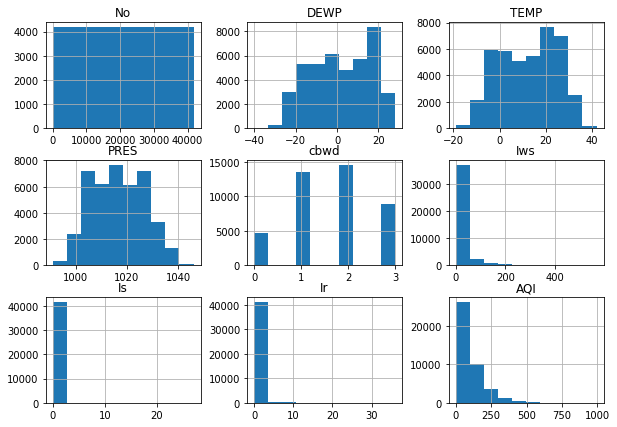

In [206]:
df_train.hist(figsize=(10,7))

In [207]:
#Droping "No" column as it does give any info
df=df_train
df_train=df_train.drop('No', axis=1)

In [208]:
Q1 = df_train.quantile(0.25)
Q3 = df_train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

DEWP     25.00
TEMP     21.00
PRES     17.00
cbwd      1.00
Iws      20.12
Is        0.00
Ir        0.00
AQI     108.00
dtype: float64


#Predicting Target Values with Multiple regression Models

In [209]:
#Creating Y_Test to check models' efficiency
X_test=df_test.drop(['AQI','No'],axis=1)
Test=pd.merge(df_test.drop(['AQI'], axis=1),df, on='No')
Y_test=Test['AQI']

In [210]:
#Splitting Data in X and Y
X_train=df_train.drop(['AQI'],axis=1)
Y_train=df_train['AQI']

In [211]:
# To check Multiple Models effeciency defining variables
model, mae, mse, rmse, R2 = [], [], [], [], []

In [212]:
#LinearRegression model
mdl1 = LinearRegression()
mdl1.fit(X_train,Y_train)
pred1 = mdl1.predict(X_test)

In [213]:
# Performance Measure
mae_lr = mean_absolute_error(Y_test, pred1)
mse_lr = mean_squared_error(Y_test, pred1)
rmse_lr = np.sqrt(mse_lr)
R2_lr = r2_score(Y_test, pred1)
model.append("LinearRegression")
mae.append(mae_lr)
mse.append(mse_lr)
rmse.append(rmse_lr)
R2.append(R2_lr)

Result = """MAE  : {} MSE  : {} RMSE : {} R^2  : {}""".format(mae_lr, mse_lr, rmse_lr, R2_lr)
Result

'MAE  : 58.299152093062624 MSE  : 6891.45962678116 RMSE : 83.01481570648194 R^2  : 0.22470199549026804'

In [214]:
# DecisionTreeRegression
dtr = DecisionTreeRegressor(max_depth=10, random_state=40)
dtr.fit(X_train, Y_train)
# Predict
pred2 = dtr.predict(X_test)

In [215]:
# Performance Measure
mae_dtr = mean_absolute_error(Y_test, pred2)
mse_dtr = mean_squared_error(Y_test, pred2)
rmse_dtr = np.sqrt(mse_dtr)
R2_dtr = r2_score(Y_test, pred2)
model.append("DecisionTreeRegression")
mae.append(mae_dtr)
mse.append(mse_dtr)
rmse.append(rmse_dtr)
R2.append(R2_dtr)

Result = """MAE  : {} MSE  : {} RMSE : {} R^2  : {}""".format(mae_dtr, mse_dtr, rmse_dtr, R2_dtr)
Result

'MAE  : 47.9756547483435 MSE  : 5038.290789787304 RMSE : 70.98091849072752 R^2  : 0.4331858551007225'

In [216]:
# RandomForestRegression
rfr = RandomForestRegressor()
rfr.fit(X_train, Y_train)
# Predict
pred3 = rfr.predict(X_test)

In [217]:
# Performance Measure
mae_rfr = mean_absolute_error(Y_test, pred3)
mse_rfr = mean_squared_error(Y_test, pred3)
rmse_rfr = np.sqrt(mse_rfr)
R2_rfr = r2_score(Y_test, pred3)
model.append("RandomForestRegression")
mae.append(mae_rfr)
mse.append(mse_rfr)
rmse.append(rmse_rfr)
R2.append(R2_rfr)

Result = """MAE  : {} MSE  : {} RMSE : {} R^2  : {}""".format(mae_rfr, mse_rfr, rmse_rfr, R2_rfr)
Result

'MAE  : 18.564955160613387 MSE  : 850.2237487859347 RMSE : 29.15859648175705 R^2  : 0.9043487430066531'

In [218]:
#xgboostRegression
xgb = XGBRegressor(max_depth=10, n_estimators=1500, eta=0.1, subsample=0.9, colsample_bytree=0.9)
xgb.fit(X_train,Y_train)
#predict
pred4 = xgb.predict(X_test)

[13:51:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [219]:
# Performance Measure
mae_xgb = mean_absolute_error(Y_test, pred4)
mse_xgb = mean_squared_error(Y_test, pred4)
rmse_xgb = np.sqrt(mse_xgb)
R2_xgb = r2_score(Y_test, pred4)
model.append("XGBOOSTRegression")
mae.append(mae_xgb)
mse.append(mse_xgb)
rmse.append(rmse_xgb)
R2.append(R2_xgb)

Result = """MAE  : {} MSE  : {} RMSE : {} R^2  : {}""".format(mae_xgb, mse_xgb, rmse_xgb, R2_xgb)
Result

'MAE  : 7.454519035572979 MSE  : 286.42805011959086 RMSE : 16.92418536058947 R^2  : 0.9677764787548999'

In [220]:
model, mae, mse, rmse, R2

(['LinearRegression',
  'DecisionTreeRegression',
  'RandomForestRegression',
  'XGBOOSTRegression'],
 [58.299152093062624, 47.9756547483435, 18.564955160613387, 7.454519035572979],
 [6891.45962678116, 5038.290789787304, 850.2237487859347, 286.42805011959086],
 [83.01481570648194, 70.98091849072752, 29.15859648175705, 16.92418536058947],
 [0.22470199549026804,
  0.4331858551007225,
  0.9043487430066531,
  0.9677764787548999])

Text(0, 0.5, 'Mean Absolute Error')

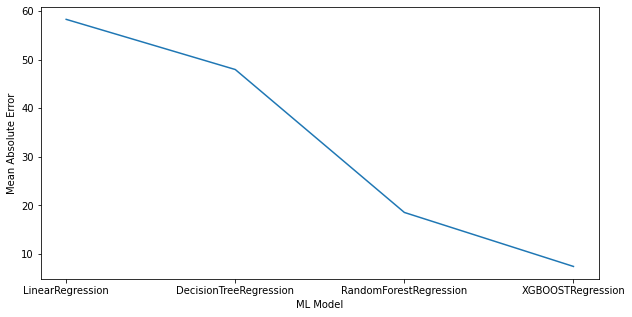

In [221]:
plt.figure(figsize=(10,5))
plt.plot(model, mae,label='MAE')
plt.xlabel("ML Model")
plt.ylabel("Mean Absolute Error")

Text(0, 0.5, 'Mean Square Error')

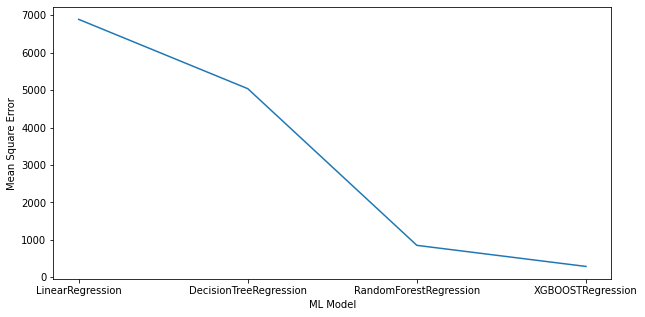

In [222]:
plt.figure(figsize=(10,5))
plt.plot(model, mse, label='MSE')
plt.xlabel("ML Model")
plt.ylabel("Mean Square Error")

Text(0, 0.5, 'Root Mean Square Error')

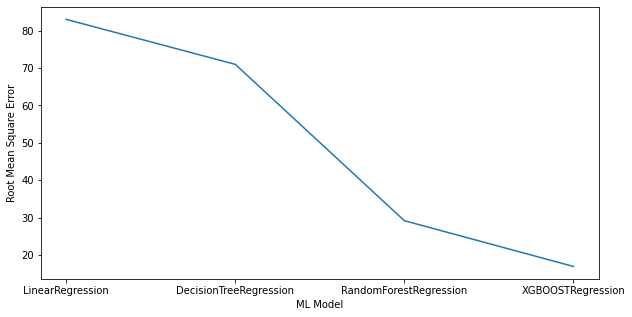

In [223]:
plt.figure(figsize=(10,5))
plt.plot(model, rmse, label='RMSE')
plt.xlabel("ML Model")
plt.ylabel("Root Mean Square Error")

Text(0, 0.5, 'Coefficient of Variance')

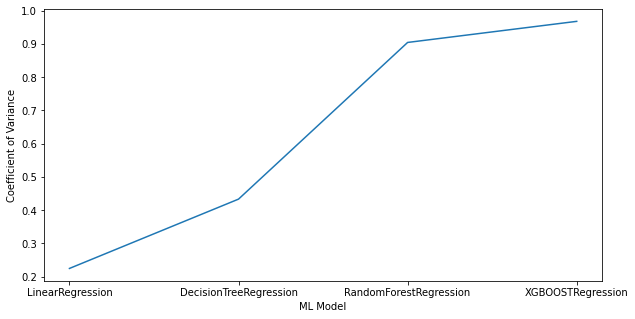

In [224]:
plt.figure(figsize=(10,5))
plt.plot(model, R2, label='R2')
plt.xlabel("ML Model")
plt.ylabel("Coefficient of Variance")

#As Errors are Minimum and R2 is maximum for XGBOOSTRegressor. So, our best model is XGBOOSTRegressor and pred4 is final predicted Target values

In [225]:
df_submit['AQI']=pred4
df_submit.to_csv('submit.csv')